# Drug dosage
Un error al administrar un medicamento puede causar graves consecuencias e incluso puede llegar a ser fatal. Estos errores suceden debido a diversas causas, entre las cuales se encuentra la administración de la dosis incorrecta. Esto a su vez puede ser causado por el descuido del personal médico que lo receta o porque la persona que consume el medicamento no sigue las indicaciones recomendadas como frecuencia o dosis. De cualquier forma, es posible identificar unos factores que determinan la dosis correcta y que sea efectiva para el paciente. Estos factores incluyen la absorción, distribución, metabolismo y eliminación del fármaco.

<img src=https://i.pinimg.com/564x/95/94/54/9594543c7afa73fa78109260abb3462f.jpg width="350"/>

Para representar este sistema en un modelo, es necesario hacer algunas simplificaciones, como asumir que el cuerpo del paciente es un solo contenedor del fármaco, es decir, no se especifica el proceso en el sistema digestivo sino que se asume que una vez el fármaco ingresa al cuerpo, se absorbe de forma inmediata en la sangre, específicamente en el plasma. La concentración del fármaco en el plasma es una forma más adecuada de determinar si una dosis es efectiva o tóxica. Es posible conocer las concentraciones mínimas y máximas para las que un fármaco actúan sin ser peligroso (Minimum effective concentration y Maximum therapeutic concentration). Otro factor a considerar para este modelo es el tiempo que tarda la mitad del fármaco en ser eliminado del cuerpo (half-life).

Para un primer caso se realiza un modelo para la aspirina, con una sola dosis. La efectividad analgésica de la aspirina está en los niveles de concentración del fármaco en plasma entre 150 a 300 microgramos por mL y puede llegar a ser tóxica en concentraciones desde 350 microgramos/mL. Se tienen las siguientea ecuaciones para modelar la concentración de aspirina al ingerir 2 de 325mg:

$\frac{dQ}{dt}=-KQ$ rate of change of the drug leaving the system

$Q=Q_0e^{-kt}$ Solución a la ecuación diferencial (para saber la cantidad del medicamento en la sangre en un tiempo determinado inmediatamente después de una dosis)

$K=\frac{-ln(0.5)}{t_{1/2}}$ La constante de eliminación que depende del half-life del fármaco

**Constantes y datos de entrada para el modelo**

  - half-life = 3.2 horas
  - plasma volume = 3000 mL
  - aspirina en plasma inicial = 2 * 325 * 1000 microgramos
  - elimination constant = $\frac{-ln(0.5}{half-life}$

**Operaciones**
  - eliminación = elimination constant * aspirina en plasma inicial
  - concentración de plasma = aspirina en plasma inicial/ plasma volume
  
  <img src="https://drive.google.com/uc?export=view&id=1cU-U6SjoAuLaC8FU5HdJNL_-T1z3ExEY" width ="400" />
  
Gráfica tomada de Introduction to computational science
Book by Angela B. Shiflet

Gracias al modelo se concluye que para una sola dosis, la concentración del medicamento decae exponencialmente.



# Modelo para varias dosis: Dilantin
Dilantin es un tratamiento para la epilepsia y su prescripción suele ser para administrar 3 veces al día (cada 8 horas) dosis de 100 mg. La concentración efectiva en plasma está entre 10 y 20 migrogramos/mL y se alcanza entre 7 y 10 días consumiendo el medicamento de acuerdo a las indicaciones. El half-life va desde 7 horas a 42 horas pero en promedio son 22.

Para modelar este sistema se toman las constantes y datos de entrada como half-life, volume, constante de eliminación, pero a diferencia de la aspirina, la concentración de Dilantin en la sangre no decae hasta que se elimina por completo sino que oscila debido a la ingesta periódica del medicamento. Esto se efetúa en el código de forma que si no han pasado las 8 horas desde la última dosis, la concentración simplemente disminuye, pero después de que el aumento de los pasos de tiempo llegar a ser múltiplo de ese intervalo, en este caso 8 horas, significa que es momento de la siguiente dosis entonces se suma la concentración de una nueva dosis.

Se especifican los datos y operaciones:
- half life = 22h
- interval = 8h
- minimum effective concentration (MEC) = 10 $\frac{\mu g}{mL}$
- maximum therapeutic concentration (MTC): 20 $\frac{\mu g}{mL}$
- volume = 3000 mL
- dosage = 100 * 1000 $\mu g$
- absorption fraction = 0.12
- elimination constant = $\frac{-ln(0.5)}{half life}$
- drug in system (para la primera dosis) = dosage * absorption fraction
- drug in system (para las demas dosis) = previous drug in system + dosage * absorption fraction
- elimination (cuando no es tiempo de la proxima dosis) = elimination constant * drug in system
- concentration (del medicamento en la sangre) = drug in system * volume

# Ejercicios propuestos
4. a. In Dilantin example, describe the effect a longer half-life has on
elimination_constant.

  b. Evaluate elimination_constant for $t_{1/2} = 7 h$

  c. Evaluate elimination_constant for $t_{1/2} = 22 h$

  d. Evaluate elimination_constant for $t_{1/2} = 42 h$

5. a. Suppose a patient taking Dilantin decides for convenience to take 300 mg once a day instead of 100 mg every 8 h. Adjusting the model in OneCompartDilantin, determine the results of such a decision. Is the decision advisable?

  b. Mathematically, determine the long-term value of $Q_n$, the quantity of Dilantin in the system immediately after the nth dose, assuming absorption
  of only (0.09)(300 mg).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
#4.a 
def effect_elim_const(half_life_effect):
  elim_const = -np.log(0.5)/half_life_effect
  return elim_const

#para 22 horas (el promedio)
print(f'la constante de eliminacion para 22 horas es:{effect_elim_const(22)}')

#para 30 horas
print(f'la constante de eliminacion para 30 horas es:{effect_elim_const(30)}')

#para 35 horas
print(f'la constante de eliminacion para 35 horas es:{effect_elim_const(35)}')

#para 40 horas
print(f'la constante de eliminacion para 40 horas es:{effect_elim_const(40)}')

#para 42 horas (maximo half life)
print(f'la constante de eliminacion para 42 horas es:{effect_elim_const(42)}')

la constante de eliminacion para 22 horas es:0.03150669002545206
la constante de eliminacion para 30 horas es:0.023104906018664842
la constante de eliminacion para 35 horas es:0.01980420515885558
la constante de eliminacion para 40 horas es:0.01732867951399863
la constante de eliminacion para 42 horas es:0.016503504299046318


Conclusión: mientras mayor sea el tiempo en el que tarda en eliminarse la mitad del medicamento del cuerpo, la constante de eliminación será menor por lo que el medicamento se va a ir eliminando del cuerpo a un ritmo más lento.

In [ ]:
#Se crea una funcion que tenga de argumentos los datos que puede variar a lo largo del ejercicio
#Half life, interval (cada cuando consume la dosis), dose (mg), total_time (si el interval aumenta, es ideal hacer mas iteraciones para que se alcance a ver cuando se equilibra)
def dilantin_concentration(half_life, interval, dose, absorption_constant, total_time):
  #constantes
  volume = 3000 #mililitros
  dosage = dose*1000 #microgramos
  #absorption_constant = 0.12
  elimination_constant = -np.log(0.5)/half_life
  dt = 0.1 #paso de tiempo

  #valores iniciales
  t = 0 #horas
  drug_in_system = 0 #microgramos

  #Creando librerias para guardar drug in system y time
  list_drug_in_s = [drug_in_system]
  time = [t]

  #procedimientos
  while t < total_time:
    if t % interval < dt :
      drug_in_system = drug_in_system + absorption_constant * dosage
    drug_in_system = drug_in_system - elimination_constant * drug_in_system * dt
    t= t + dt
    time.append(t)
    list_drug_in_s.append(drug_in_system)

  concentration = [drug/volume for drug in list_drug_in_s] #el for es para dividir cada elemento de la lista drug in system por el volumen del plasma

  return time, concentration

In [ ]:
x, y = dilantin_concentration(22, 8, 100, 0.12, 200)

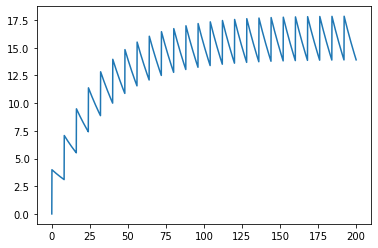

In [ ]:
plt.plot(x,y) #4.c half life 22h

In [ ]:
x1, y1 = dilantin_concentration(7, 8, 100, 0.12, 200) #4.b half life 7h

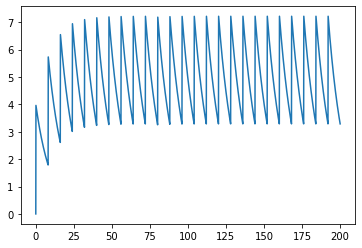

In [ ]:
plt.plot(x1, y1)

In [ ]:
x2, y2 = dilantin_concentration(42, 8, 100, 0.12, 200) #4.d half life 42

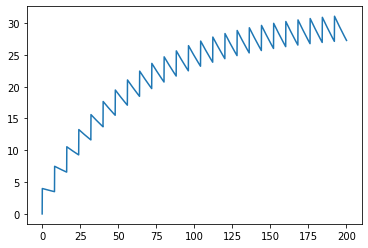

In [ ]:
plt.plot(x2, y2)

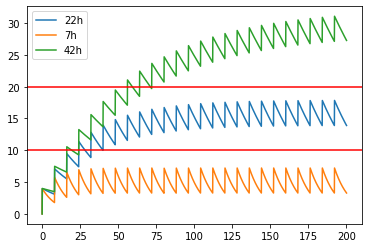

In [ ]:
plt.plot(x, y)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.axhline(10, c="red") #minimum effective concentration
plt.axhline(20, c="red") #maximum therapeutic concentration
plt.legend(['22h', '7h', '42h'])

##Conclusiones al variar el half life para una misma dosis

Es posible evidenciar que el único half life que se mantiene entre el MEC y MTC es el de 22 horas, por lo que sería es más ideal para un tratamiento.

El half life de 42 horas llega a un punto de equilibrio que supera por mucho la Maximum therapeutic concentration, lo que significa que un tratamiento con estas indicaciones puede llegar a ser peligroso para el paciente.Esto sucede porque la constante de eliminación es muy pequeña para los intervalos y concentraciones de cada dosis, por lo que, al momento de consumir la siguiente dosis, no se ha eliminado suficiente concentración previa entonces esto genera un crecimiento mayor.

Ahora, con el half life de 7 horas sucede lo contrario, pues la concentración del medicamento se elimina tan rápido que para el momento de ingerir la siguiente dosis, la concentración previa en el cuerpo ya es muy mínima por lo que el total de la concentración previa más la siguiente dosis ni siquiera llega al Minimum effective concentration, lo que significa que un tratamiento con esta indicaciones sería ineficaz para el paciente.

In [ ]:
#5.a Se cambian los parámetros de la función: half life igual, interval 24 horas, dose 300mg, total_time 400 horas
x3, y3 = dilantin_concentration(22, 24, 300, 0.12, 400)

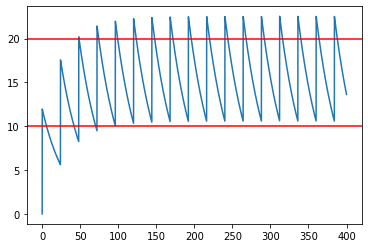

In [ ]:
plt.plot(x3, y3)
plt.axhline(10, c="red") #minimum effective concentration
plt.axhline(20, c="red") #maximum therapeutic concentration

##Conclusiones al consumir en una sola dosis el total de dosis diarias
Como se puede evidenciar en la gráfica, la idea de consumir varias dosis en un solo momento puede no ser tan adecuado, pues la concentración del medicamento en el cuerpo llega a superar la Maximum therapeutic concentration en los momentos en los que se ingiere esa gran dosis, lo que puede llegar a ser peligroso para el paciente y resultar en efectos no tolerables. Algo para resaltar es que, al tener tanto tiempo entre una dosis y otra, el medicamento se elimina casi al punto de llegar al Minimum effective concentration, pero después de esto, al consumir la siguiente dosis vuelve a superar el MTC y esto es peligroso, además de que esas fluctuaciones de gran amplitud no permiten que el tratamiento funcione como debería. En conclusión, no es una decisión recomendable.

##Determinando la cantidad del medicamento en la sangre a largo plazo $Q_n$
Se parte de la solución a la ecuación diferencial $Q=Q_0e^{-kt}$

$k$ es la constante de eliminación que depende del half life, la dosis es de $300 mg$ cada 8 horas pero la fracción de absorción es $0.09$, entonces para determinar la cantidad de medicamento en el sistema 8 horas después de la primera dosis, es decir, justo antes de la segunda dosis, resolvemos:

$Q_0=(300mg)(0.09)=27mg$

$Q=Q_0e^{-0.03150669(8)}=(27mg)(0.777203141)=20.98448481mg$

Por lo tanto, después de 8h, alrededor del 77.72% de la cantidad de medicamento inicial se mantiene en la sangre en ese momento. Ahora, como el la operación se hace después de 8 horas, significa que ya es momento de la segunda dosis por lo que se suma al resultado anterior esa nueva dosis:

$Q_1=27mg+2098448481mg=47.98448481mg$

Para la siguiente dosis:
$Q_2=Q_1(0.777203141)+27mg=37.29369231mg$

Para cualquier $Q_n$ vamos a tener la misma secuencia en la que multiplicamos por 0.7772 la fracción de la dosis efectiva y este resultado se suma a la nueva dosis. Esta suma es una serie geométrica finita:
$$\frac{1-a^{n}}{1-a}$$
Donde $n$ es el número de la dosis y $a$ es el porcentaje que queda del medicamento de la dosis anterior (0.777203141)

Así que para determinar la cantidad de medicamento después de la dosis $n$:
$$Q_n=27*\frac{1-a^{n}}{1-a}$$

Luego, el resultado que se obtiene de esta operación es la cantidad de medicamento, sin embargo, para entender estos valores se pasa a la concentración en microgramos en la sangre:

$Concentración=\frac{Q_n}{volume}*1000$

Se hacen los cálculos para:
- $n=0$ para el valor más cercano (que tiende a infinito) --> 40.395542539372514
- $n=10$ --> 37.14707212553142
- $n=30$ --> 40.374535257812624 
- $n=50$ --> 40.39540668901147
- $n=70$ --> 40.39554166085234
- $n=100$ --> 40.39554253891564


Con esto se puede concluir que la concentración de este medicamento con 22 h de half life, intervalos de 8 horasy  dosis de 300 mg con fracción de absorción de 0.09 se estabiliza aproximadamente en 40.395 microgramos/mL, es decir que después de consumir el medicamento por un tiempo, imediatamente después de que consuma una dosis, la concentración del medicamento en el cuerpo será esa aproximadamente.

A continuación está el código de las operaciones y la gráfica de la concentración para comprobar los cálculos.

In [ ]:
#se usa la primera funcion para obtener el valor mas exacto de e^-kt
a = effect_elim_const(22)
e = math.exp(-a*8)
print (e)

0.7772031408854596


In [ ]:
n0 = 27 *(1- 0)/(1 - e)
n0 = n0/3000
n0 = n0 *1000
print (f'n0={n0}')

n10 = 27 *(1 - (e**10))/(1 - e)
n10 = n10/3000
n10 = n10 *1000
print (f'n10={n10}')

n30 = 27 *(1 - (e**30))/(1 - e)
n30 = n30/3000
n30 = n30 *1000
print (f'n30={n30}')

n50 = 27 *(1 - (e**50))/(1 - e)
n50 = n50/3000
n50 = n50 *1000
print (f'n50={n50}')

n70 = 27 *(1 - (e**70))/(1 - e)
n70 = n70/3000
n70 = n70 *1000
print (f'n70={n70}')

n100 = 27 *(1 - (e**100))/(1 - e)
n100 = n100/3000
n100 = n100 *1000
print (f'n100={n100}')

n0=40.395542539372514
n10=37.14707212553142
n30=40.374535257812624
n50=40.39540668901147
n70=40.39554166085234
n100=40.39554253891564


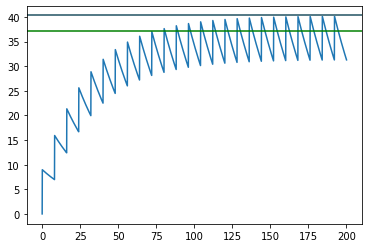

In [ ]:
x4, y4 = dilantin_concentration(22, 8, 300, 0.09, 200)
plt.plot(x4, y4)
#plt.ylim([37, 41]) #para ver mas de cerca las diferencias
plt.axhline(n0)
plt.axhline(n10, c="green")
plt.axhline(n30, c="yellow")
plt.axhline(n50, c="red")
plt.axhline(n70, c= "orange")
plt.axhline(n100)